# visualising using networkx
gephi was not able to export the image appropriately, so I used networkx here instead

## (1) Deepseek-R1

In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import os
import math
import csv # For reading csv just in case pandas has issues with quotes

# Display plots inline in the notebook
%matplotlib inline

In [2]:

nodes_csv_path = './output/nodes-and-edges/deepseek-r1_nodes.csv' 
edges_csv_path = './output/nodes-and-edges/deepseek-r1_edges.csv' 
try:
    nodes_df = pd.read_csv(nodes_csv_path)
    edges_df = pd.read_csv(edges_csv_path)
    if not {'Id', 'Label', 'Type'}.issubset(nodes_df.columns):
        raise ValueError("Nodes CSV must contain 'Id', 'Label', 'Type' columns.")
    if not {'Source', 'Target'}.issubset(edges_df.columns):
        raise ValueError("Edges CSV must contain 'Source', 'Target' columns.")
    print(f"Loaded {len(nodes_df)} nodes and {len(edges_df)} edges.")
    
except FileNotFoundError:
    print(f"Error: Cannot find one or both files. Check paths:\n {nodes_csv_path}\n {edges_csv_path}")
except Exception as e:
    print(f"Error loading CSV files: {e}")

Loaded 82 nodes and 69 edges.


In [3]:

G = nx.Graph()
for index, row in nodes_df.iterrows():
    node_id = str(row['Id']) 
    G.add_node(node_id, label=str(row['Label']), type=str(row['Type']))
edges_df['Source'] = edges_df['Source'].astype(str)
edges_df['Target'] = edges_df['Target'].astype(str)
G.add_edges_from(edges_df[['Source', 'Target']].values)

print(f"Graph created with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")
# print("Nodes:", list(G.nodes(data=True))[:5]) # Print first 5 nodes with data
# print("Edges:", list(G.edges())[:5]) # Print first 5 edges

Graph created with 82 nodes and 69 edges.


In [4]:
# Calculate node positions using a layout algorithm
print("Calculating layout...")
# Adjust k for spacing: smaller k spreads more. Iterations improve layout.
k_val = 0.9 / math.sqrt(G.number_of_nodes()) if G.number_of_nodes() > 0 else 0.1
try:
    pos = nx.spring_layout(G, k=k_val, iterations=50, seed=42) # Use seed for reproducibility
    # pos = nx.kamada_kawai_layout(G) # Alternative layout
    print("Layout calculated.")
except Exception as e:
    print(f"Error calculating layout: {e}. Using random layout.")
    pos = nx.random_layout(G, seed=42)


# Define node colors based on 'Type'
color_map = {
    'Main Topic': 'skyblue',
    'Subtopic': 'lightgreen',
    'Unmapped': 'salmon'
}
node_colors = [color_map.get(G.nodes[node].get('type', 'Unknown'), 'gray') for node in G.nodes()]

# Define node sizes based on degree (number of connections)
degrees = dict(G.degree())
min_size = 100
max_size = 1500 # Prevent nodes from becoming excessively large
size_factor = 30
node_sizes = [min_size + degrees.get(node, 0) * size_factor for node in G.nodes()]
node_sizes = [min(size, max_size) for size in node_sizes] # Clamp size

# Prepare labels
labels = {node: G.nodes[node].get('label', node) for node in G.nodes()} # Use label attribute, fallback to node ID

Calculating layout...
Layout calculated.


Drawing graph...


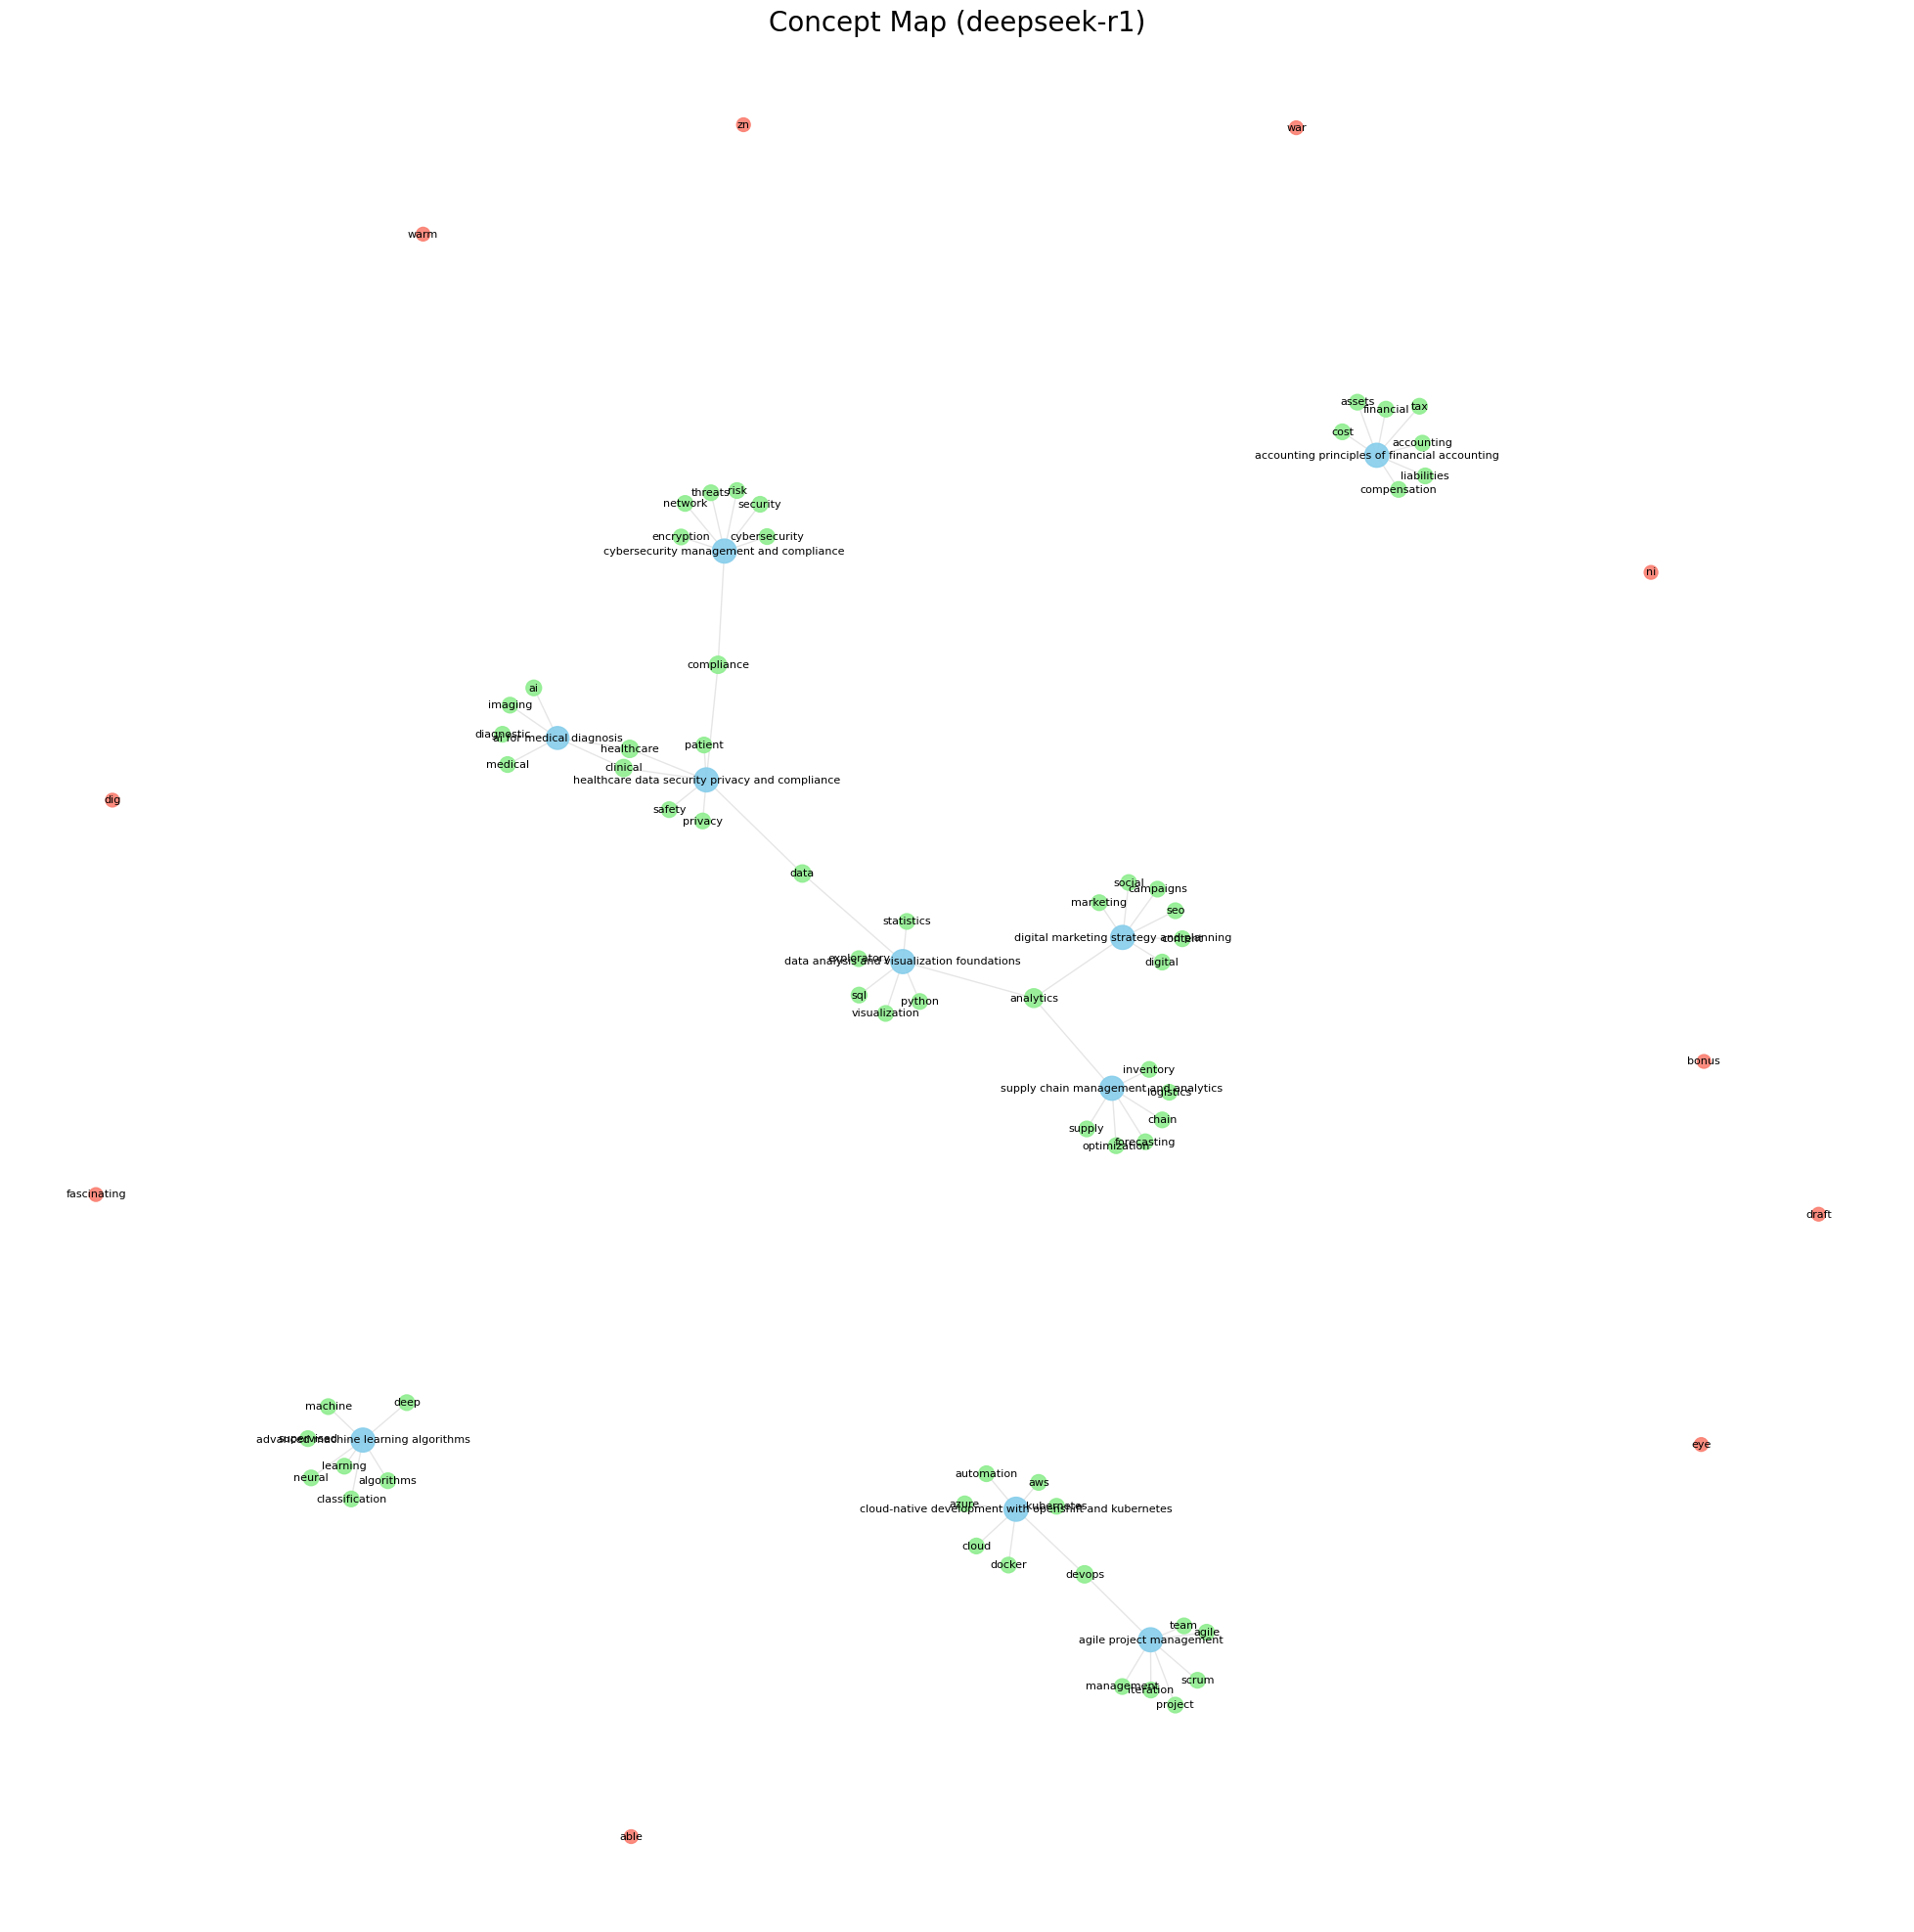

Graph display complete.
Graph saved to: ./output/network-x-imgs/deepseek_network.png


<Figure size 640x480 with 0 Axes>

In [8]:
print("Drawing graph...")
plt.figure(figsize=(25, 25)) # Make figure larger for clarity

# Draw edges first
nx.draw_networkx_edges(
    G,
    pos,
    alpha=0.2, # Make edges faint
    edge_color="gray"
)

# Draw nodes
nx.draw_networkx_nodes(
    G,
    pos,
    node_color=node_colors,
    node_size=node_sizes,
    alpha=0.9
)

# Draw labels
# Adjust font_size and consider drawing selectively if too crowded
nx.draw_networkx_labels(
    G,
    pos,
    labels=labels,
    font_size=8,
    font_color="black",
    # Example: Draw only labels for nodes with degree > X or type == 'Main Topic'
    # labels={node: label for node, label in labels.items() if G.degree(node) > 5 or G.nodes[node]['type'] == 'Main Topic'},
)

plt.title(f"Concept Map ({os.path.basename(nodes_csv_path).split('_nodes')[0]})", size=20)
plt.axis('off') # Hide axes
plt.show() # Display the plot in the notebook output
print("Graph display complete.")

# To save the figure instead of showing:
output_image_path = './output/network-x-imgs/deepseek_network.png'
plt.savefig(output_image_path, format="png", dpi=300, bbox_inches="tight")
print(f"Graph saved to: {output_image_path}")

In [ ]:
# try:
#     from pyvis.network import Network
# 
#     print("Creating interactive pyvis graph...")
#     net = Network(notebook=True, height='800px', width='100%', cdn_resources='in_line')
# 
#     # Add nodes with attributes recognized by pyvis (size, color, title)
#     for i, node in enumerate(G.nodes()):
#         node_data = G.nodes[node]
#         node_id = str(node) # Ensure string ID
#         label = node_data.get('label', node_id)
#         node_type = node_data.get('type', 'Unknown')
#         color = color_map.get(node_type, 'gray')
#         size = node_sizes[i] / 50 # pyvis uses different size scaling, adjust factor
#         title_str = f"Label: {label}\nType: {node_type}\nDegree: {degrees.get(node, 0)}" # Tooltip
#         
#         net.add_node(node_id, label=label, title=title_str, color=color, size=size)
# 
#     # Add edges
#     for edge in G.edges():
#         source_id = str(edge[0])
#         target_id = str(edge[1])
#         net.add_edge(source_id, target_id)
# 
#     # Customize physics/layout if desired
#     # net.show_buttons(filter_=['physics'])
#     # net.force_atlas_2based() # pyvis also has FA2 layout
# 
#     # Generate and display the interactive HTML file
#     # You might need to adjust output path based on notebook location
#     pyvis_output_filename = 'outputs/deepseek-r1/interactive_deepseek_network.html' 
#     net.show(pyvis_output_filename) 
#     print(f"Interactive graph saved to: {pyvis_output_filename}")
#     # Display in notebook output (might require trusting the notebook)
#     # from IPython.display import display, HTML
#     # display(HTML(filename=pyvis_output_filename))
#     
# except ImportError:
#     print("\nPyvis library not found. Skipping interactive plot.")
#     print("Install using: pip install pyvis")
# except Exception as e:
#     print(f"Error creating pyvis plot: {e}")


Creating interactive pyvis graph...
outputs/deepseek-r1/interactive_deepseek_network.html
Error creating pyvis plot: [Errno 2] No such file or directory: 'outputs/deepseek-r1/interactive_deepseek_network.html'


In [ ]:
# 